In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
data_filename = "amazon_data_18-11-19clean2.csv"

In [4]:
df = pd.read_csv(data_filename,delimiter=";")

In [5]:
df

,time,ASIN,amazon_choice,amazon_delivered,answered_qs,availibility,brand,cart_count,category,deal_price,...,pay_on_delivery,price,price_normalized,return_policy,seller_name,seller_rating,stars,url,warranty,weight
0,2019-09-05 21:15:03.783985+00:00,B00OLHQJD0,1,1,177.0,In stock.,IFB,0,"Home & Kitchen,Large Appliances,Microwave Ovens",0.0,...,0,10530.000000,0.542857,10 Days Replacement,Festivals.,4.400000,4.0,https://www.amazon.in/IFB-Convection-Microwave...,1 Year Warranty,0
1,2019-09-05 21:15:08.217605+00:00,B07L57BMBR,1,1,16.0,Only 2 left in stock.,Samsung,0,"Computers & Accessories,Monitors",0.0,...,0,24398.000000,1.000000,10 Days Replacement,Best Price 99,4.500000,3.8,https://www.amazon.in/dp/B07L57BMBR,2 Year Warranty,8 Kg
2,2019-09-05 21:15:11.753613+00:00,B07HGJKDQB,2,1,1000.0,In stock.,No brand,0,"Electronics,Mobiles & Accessories,Smartphones ...",0.0,...,0,57999.000000,1.000000,10 Days Replacement,Darshita Electronics,4.700000,4.6,https://www.amazon.in/gp/product/B07HGJKDQB,1 Year Warranty,204 g
3,2019-09-05 21:15:15.448221+00:00,0,2,0,756.0,In stock.,No brand,0,0,0.0,...,0,26600.000000,-0.420454,No return policy,Appario Retail Private Ltd,4.700000,4.7,https://www.amazon.in/dp/B07C4YKR3J,No warranty,0
4,2019-09-05 21:15:19.391380+00:00,0,1,1,0.0,Only 3 left in stock.,No brand,0,"Shoes & Handbags,Shoes,Men's Shoes,Sports & Ou...",0.0,...,1,2299.000000,-0.200000,30 Days Returns & Exchange,Cloudtail India,4.600000,3.6,https://www.amazon.in/Adidas-Mens-Running-Shoe...,90 Day Warranty,0
5,2019-09-05 21:15:23.793105+00:00,B01BMJ0Y76,1,1,25.0,In stock.,GIGABYTE,0,"Computers & Accessories,Accessories & Peripher...",0.0,...,1,3990.000000,-0.751351,10 Days Replacement,M-TECHNO,4.100000,4.6,https://www.amazon.in/dp/B01BMJ0Y76,No warranty,998 g
6,2019-09-05 21:15:26.698575+00:00,B07NSLTQH6,1,1,222.0,In stock.,Samsung,0,"Electronics,Home Theater, TV & Video,Televisio...",0.0,...,0,37999.000000,-0.500000,10 Days Replacement,Cloudtail India,4.600000,4.0,https://www.amazon.in/Samsung-Inches-Smart-UA4...,1 Year Warranty,9.6 Kg
7,2019-09-05 21:15:34.795836+00:00,0,1,1,0.0,Only 1 left in stock.,No brand,0,"Watches,Men",0.0,...,1,4832.000000,-1.000000,30 Days Returns,Cloudtail India,4.600000,0.0,https://www.amazon.in/M-WATCH-Maxi-Analog-Grey...,No warranty,0
8,2019-09-05 21:34:39.818778+00:00,B07HGJKDQB,2,1,1000.0,In stock.,No brand,0,"Electronics,Mobiles & Accessories,Smartphones ...",0.0,...,0,57999.000000,1.000000,10 Days Replacement,Darshita Electronics,4.700000,4.6,https://www.amazon.in/gp/product/B07HGJKDQB,1 Year Warranty,204 g
9,2019-09-05 21:34:43.620209+00:00,0,1,1,0.0,Only 1 left in stock.,No brand,0,"Watches,Men",0.0,...,1,4832.000000,-1.000000,30 Days Returns,Cloudtail India,4.600000,0.0,https://www.amazon.in/M-WATCH-Maxi-Analog-Grey...,No warranty,0


No handles with labels found to put in legend.


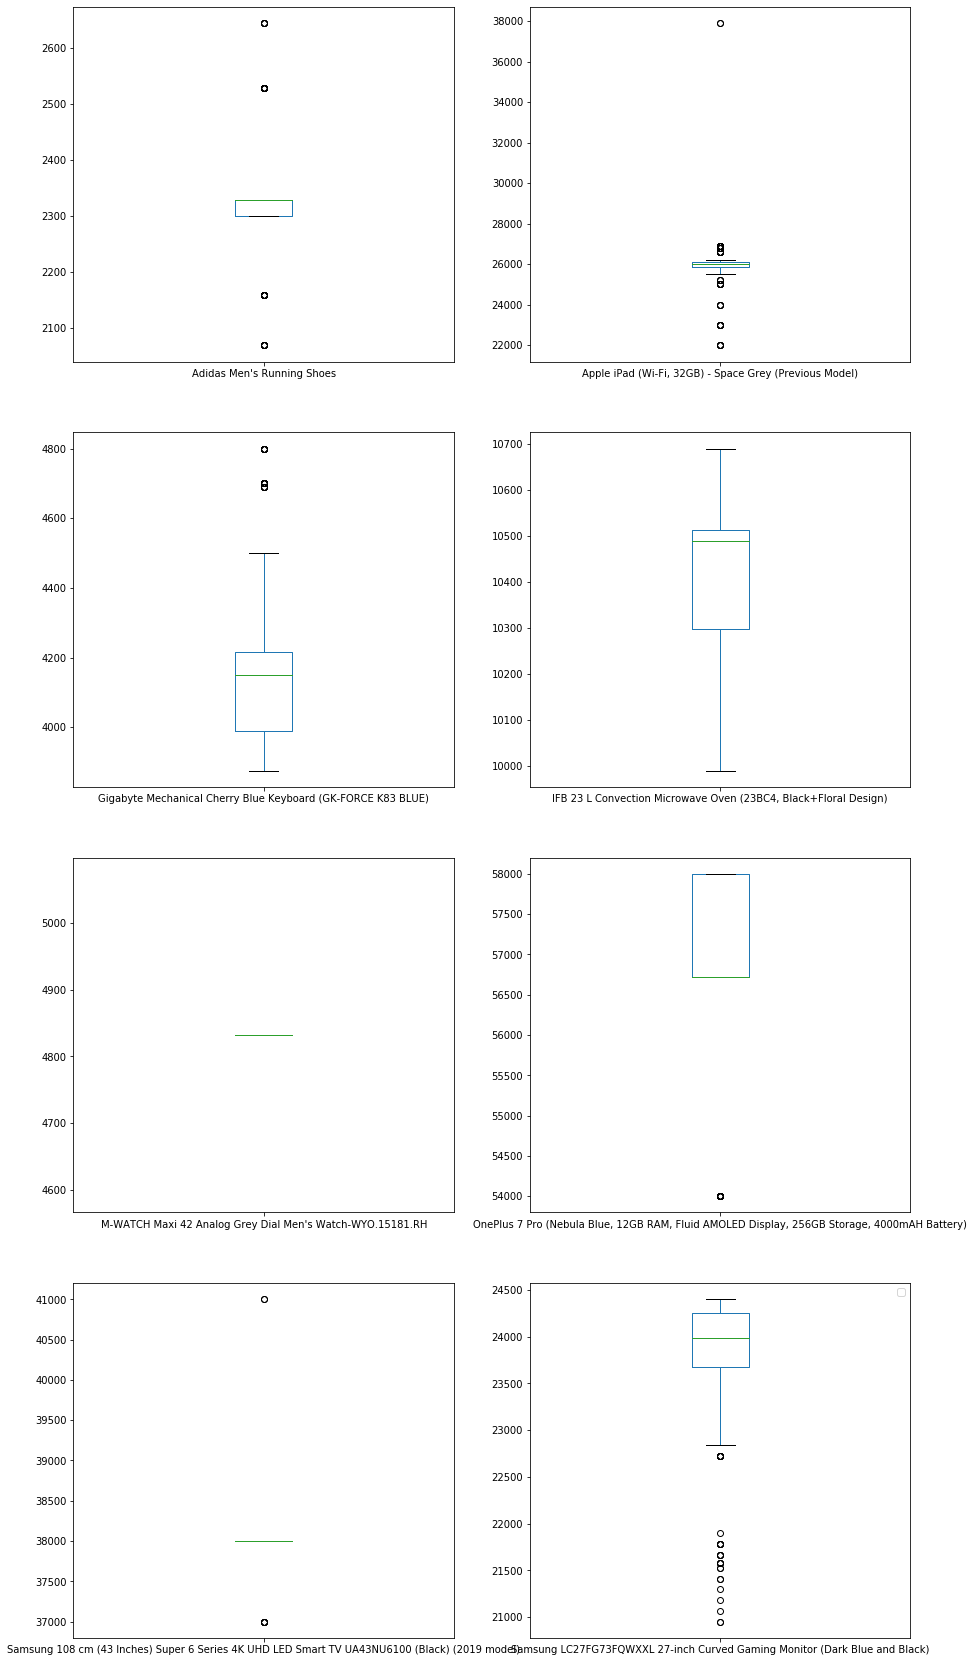

In [7]:
grouped = df.groupby('name')

ncols = 2
nrows = int(np.ceil(grouped.ngroups/ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,30), sharey=False)

for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
    
        grouped.get_group(key)["price"].plot(ax=ax, label=key, legend=True,kind = 'box')

ax.legend()
plt.show()

ParserError: Error tokenizing data. C error: Expected 8 fields in line 4, saw 16


In [4]:
amazon_data_28-10-19clean.csv

SyntaxError: invalid syntax (<ipython-input-4-d1a71f8023ee>, line 1)